In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bss

plt.rcParams.update({'font.size': 14})

## Principal Component Analysis
This is a statistical method. 

<ins>Hypothesis:</ins> the sources are uncorrelated.

First, let's generate the data (with no noise to begin). We consider n = 2 sources and m = 2 observations in order to have a geometrical interpretation of the different steps.

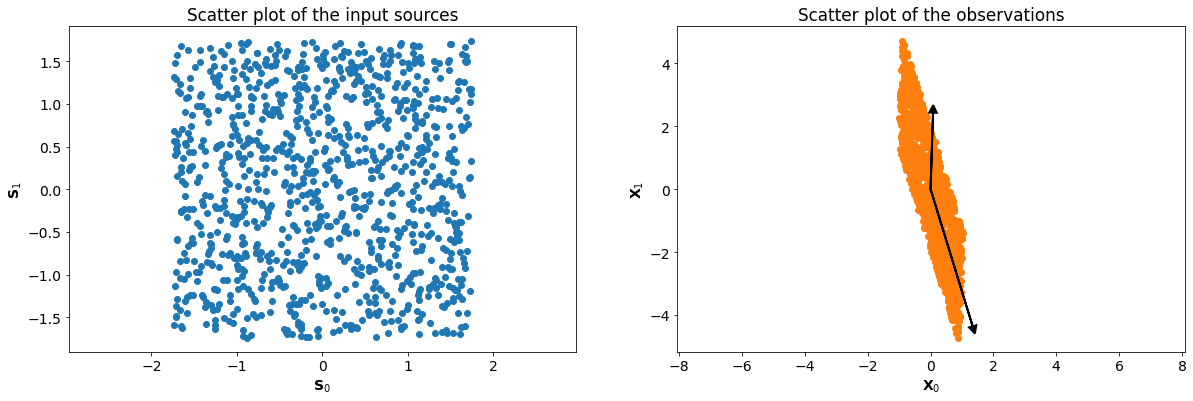

In [2]:
# Generate data

n = 2         # number of sources
m = 2         # number of observations
t = 1024      # number of samples

s_type = 2    # uniform random sources

X, A, S = bss.makeMixture(s_type=s_type, n=n, m=m, t=t)

fig = plt.figure(figsize=(20, 6))
fig.add_subplot(1,2,1)
plt.title('Scatter plot of the input sources')
plt.plot(S[0, :], S[1, :], 'C0o')
plt.xlabel("$\mathbf{S}_0$")
plt.ylabel("$\mathbf{S}_1$")
plt.axis('equal');

fig.add_subplot(1,2,2)
plt.title('Scatter plot of the observations')
vrange = 0.5*max(np.sqrt(np.sum(X*X, 0)))
plt.arrow( 0, 0, vrange*A[0, 0], vrange*A[1, 0], fc="k", ec="k", linewidth=2, head_width=0.1*vrange, head_length=0.1*vrange)
plt.arrow( 0, 0, vrange*A[0, 1], vrange*A[1, 1], fc="k", ec="k", linewidth=2, head_width=0.1*vrange, head_length=0.1*vrange)
plt.plot(X[0,:], X[1,:], 'C1o', zorder=0)
plt.xlabel("$\mathbf{X}_0$")
plt.ylabel("$\mathbf{X}_1$")
plt.axis('equal');

The arrows on the plot above are the columns of $\mathbf{A}$.

Decorrelation can be measured via the covariance matrix of the estimated sources: it should be diagonal (uncorrelated sources hypothesis).

Let $\mathbf{R_M}$ denote the covariance matrix of a matrix $\mathbf{M}$. We have: $\mathbf{R_X} = \mathbf{XX}^T = \mathbf{ASS}^T\mathbf{A}^T = \mathbf{A}\mathbf{R_S}\mathbf{A}^T$.

PCA simply performs a diagonalization of $\mathbf{R_X}$: $\mathbf{R_X} = \mathbf{UDU}^T$ from which we identify $\mathbf{A} = \mathbf{U}$ and deduce $\mathbf{S} = \mathbf{A}^{-1} \mathbf{X} = \mathbf{A}^T \mathbf{X}$.

Covariance matrix of the estimated sources by PCA:
 [[ 8.61567318e-02 -3.19067028e-17]
 [-3.19067028e-17  4.53430020e+00]]


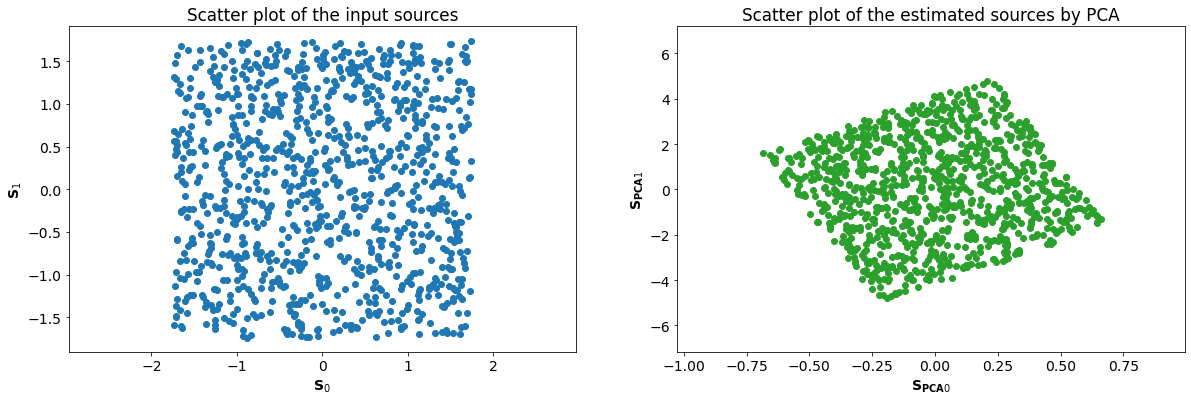

In [3]:
# Unmix sources with PCA

A_pca, S_pca = bss.pca(X, n)

Mrange = 1.5*np.max(S_pca, 1)
mrange = 1.5*np.min(S_pca, 1)
vrange = 0.5*max([max(abs(Mrange)),max(abs(mrange))])

G = np.linalg.pinv(A_pca)@A

fig = plt.figure(figsize=(20, 6))
fig.add_subplot(1,2,1)
plt.title('Scatter plot of the input sources')
plt.plot(S[0, :], S[1, :], 'C0o')
plt.xlabel("$\mathbf{S}_0$")
plt.ylabel("$\mathbf{S}_1$")
plt.axis('equal');

fig.add_subplot(1,2,2)
plt.title('Scatter plot of the estimated sources by PCA')
#plt.arrow(0, 0, vrange*G[0,0], vrange*G[1,0], fc="k", ec="k", linewidth=2,head_width=0.1*vrange, head_length=0.1*vrange)
#plt.arrow(0, 0, vrange*G[0,1], vrange*G[1,1], fc="k", ec="k", linewidth=2,head_width=0.1*vrange, head_length=0.1*vrange)
plt.plot(S_pca[0,:], S_pca[1,:], 'C2o', zorder=0)
plt.xlabel("$\mathbf{S_{PCA}}_0$")
plt.ylabel("$\mathbf{S_{PCA}}_1$")
plt.axis([mrange[0], Mrange[0], mrange[1], Mrange[1]]);
print('Covariance matrix of the estimated sources by PCA:\n', np.cov(S_pca))

The estimated sources are not correlated. Yet, the solution is not satisfactory.

Limitations:
- the estimated mixing matrix can only be orthogonal,
- different uncorrelated solutions exist (consider $\mathbf{S}' = \mathbf{US}$ where $\mathbf{UU}^T = \mathbf{I}$).

<b>Next:</b> [3. Independant Component Analysis](./3_Independant_Component_Analysis.ipynb)